In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [26]:
df = pd.read_csv('matches.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4800 non-null   int64  
 1   date          4800 non-null   object 
 2   time          4800 non-null   object 
 3   comp          4800 non-null   object 
 4   round         4800 non-null   object 
 5   day           4800 non-null   object 
 6   venue         4800 non-null   object 
 7   result        4800 non-null   object 
 8   gf            4800 non-null   float64
 9   ga            4800 non-null   float64
 10  opponent      4800 non-null   object 
 11  xg            4800 non-null   float64
 12  xga           4800 non-null   float64
 13  poss          4800 non-null   float64
 14  attendance    3916 non-null   float64
 15  captain       4800 non-null   object 
 16  formation     4800 non-null   object 
 17  referee       4800 non-null   object 
 18  match report  4800 non-null 

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4800.0,23.081250,14.568935,0.0,11.0,22.0,35.0,61.0
gf,4800.0,1.390208,1.281258,0.0,0.0,1.0,2.0,9.0
ga,4800.0,1.390208,1.281258,0.0,0.0,1.0,2.0,9.0
xg,4800.0,1.344562,0.801746,0.0,0.7,1.2,1.8,5.9
xga,4800.0,1.344562,0.801746,0.0,0.7,1.2,1.8,5.9
poss,4800.0,50.001250,12.806997,18.0,40.0,50.0,60.0,82.0
attendance,3916.0,38512.472932,17024.905791,2000.0,25434.0,32185.5,53222.0,83222.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4800.0,12.380000,5.428020,0.0,8.0,12.0,16.0,36.0
sot,4800.0,4.118125,2.432246,0.0,2.0,4.0,6.0,15.0


In [29]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [30]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2022,Manchester City
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,1.0,0.3,59.0,NaN,Kyle Walker,4-2-3-1,Robert Jones,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2022,Manchester City
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2022,Manchester City
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,2.2,1.4,68.0,52899.0,Kyle Walker,4-2-3-1,Michael Oliver,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2022,Manchester City
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,3.6,0.9,68.0,62475.0,Kyle Walker,4-2-3-1,Andy Madley,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,38,2018-04-15,16:00,Premier League,Matchweek 34,Sun,Away,W,1.0,0.0,Manchester Utd,0.7,0.7,30.0,75095.0,Chris Brunt,4-4-1-1,Paul Tierney,Match Report,NaN,10.0,4.0,18.1,0.0,0,0,2016,West Bromwich Albion
4796,39,2018-04-21,12:30,Premier League,Matchweek 35,Sat,Home,D,2.0,2.0,Liverpool,1.3,1.3,39.0,24520.0,Chris Brunt,4-4-1-1,Stuart Attwell,Match Report,NaN,13.0,6.0,17.7,0.0,0,0,2016,West Bromwich Albion
4797,40,2018-04-28,15:00,Premier League,Matchweek 36,Sat,Away,W,1.0,0.0,Newcastle Utd,0.7,1.8,38.0,52283.0,Chris Brunt,4-4-1-1,David Coote,Match Report,NaN,9.0,2.0,20.1,0.0,0,0,2016,West Bromwich Albion
4798,41,2018-05-05,15:00,Premier League,Matchweek 37,Sat,Home,W,1.0,0.0,Tottenham,1.6,1.2,26.0,23685.0,Chris Brunt,4-4-1-1,Mike Jones,Match Report,NaN,9.0,1.0,10.2,0.0,0,0,2016,West Bromwich Albion


In [31]:
df.shape

(4800, 28)

In [32]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       884
captain            0
formation          0
referee            0
match report       0
notes           4800
sh                 0
sot                0
dist               3
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [33]:
df = df.drop_duplicates()


In [34]:
df["team"].value_counts()

Manchester City             240
Liverpool                   240
Arsenal                     240
Tottenham Hotspur           240
Manchester United           240
Newcastle United            240
Brighton and Hove Albion    240
West Ham United             240
Chelsea                     240
Crystal Palace              240
Everton                     240
Southampton                 228
Leicester City              228
Wolverhampton Wanderers     202
Burnley                     202
Bournemouth                 164
Aston Villa                 164
Watford                     152
Fulham                      126
Leeds United                114
Sheffield United             88
Brentford                    88
Norwich City                 76
West Bromwich Albion         76
Huddersfield Town            76
Nottingham Forest            50
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Luton Town                   12
Name: team, dtype: int64

In [35]:
value_counts = df['team'].value_counts()
df =  df[~df['team'].isin(value_counts.index[value_counts < 50])]

In [36]:
value_counts = df['opponent'].value_counts()
df =  df[~df['opponent'].isin(value_counts.index[value_counts < 50])]

Nottingham Forest            50
West Bromwich Albion         38
Luton Town                   12

bu takimlar cikarilabilir

In [37]:
df["opponent"].value_counts()

Crystal Palace     234
Arsenal            234
Manchester City    234
Newcastle Utd      234
Tottenham          233
West Ham           233
Brighton           233
Manchester Utd     233
Liverpool          233
Chelsea            233
Everton            233
Leicester City     222
Southampton        222
Wolves             199
Burnley            195
Aston Villa        163
Bournemouth        158
Watford            146
Fulham             123
Leeds United       114
Brentford           88
Sheffield Utd       88
Norwich City        76
West Brom           72
Huddersfield        70
Name: opponent, dtype: int64

In [38]:
df['round'] = df['round'].str[-2:].astype(int)


In [39]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [40]:
columns_to_drop = [
    "match report", "notes", "dist", "pk", "pkatt", "Unnamed: 0",
    "date", "time", "comp"
]

# Belirtilen sütunları veri setinden kaldırma
df = df.drop(columns=columns_to_drop, errors='ignore')

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Veri setini yükleyin veya mevcut veri setinizi df olarak tanımlayın
# Örnek olarak, df veri setinizi yükleyelim:
# df = pd.read_csv('veriseti.csv')

# One-hot encoding için kategorik sütunlar
one_hot_encode_columns = ['venue',"result"]

# Diğer object tipindeki sütunlar
object_columns_to_label_encode = [col for col in df.select_dtypes(include=['object']).columns if col not in one_hot_encode_columns]

# One-hot encoding işlemi
df = pd.get_dummies(df, columns=one_hot_encode_columns)

# Label encoding işlemi
label_encoder = LabelEncoder()
for col in object_columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Sonuçları görüntüle
print("One-Hot Encoded Veri Seti:")
print(df.head())

One-Hot Encoded Veri Seti:
   round  day   gf   ga  opponent   xg  xga  poss  attendance  captain  \
0      1    0  3.0  0.0         5  1.9  0.3  65.0     21572.0      107   
1      2    2  1.0  0.0        16  1.0  0.3  59.0         NaN      112   
2      3    3  2.0  1.0        18  3.5  0.7  79.0     31336.0      112   
3      4    2  5.0  1.0         9  2.2  1.4  68.0     52899.0      112   
4      5    2  3.0  1.0        23  3.6  0.9  68.0     62475.0      112   

   formation  referee    sh   sot   fk  season  team  hour  venue_Away  \
0         12        4  17.0   8.0  0.0    2022    14    20           1   
1         12       25  14.0   4.0  0.0    2022    14    20           0   
2         12        9  29.0   9.0  2.0    2022    14    14           1   
3         12       17   6.0   4.0  0.0    2022    14    15           0   
4         12        1  29.0  13.0  1.0    2022    14    15           1   

   venue_Home  result_D  result_L  result_W  
0           0         0         0    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4799
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   round       4503 non-null   int64  
 1   day         4503 non-null   int64  
 2   gf          4503 non-null   float64
 3   ga          4503 non-null   float64
 4   opponent    4503 non-null   int64  
 5   xg          4503 non-null   float64
 6   xga         4503 non-null   float64
 7   poss        4503 non-null   float64
 8   attendance  3619 non-null   float64
 9   captain     4503 non-null   int64  
 10  formation   4503 non-null   int64  
 11  referee     4503 non-null   int64  
 12  sh          4503 non-null   float64
 13  sot         4503 non-null   float64
 14  fk          4503 non-null   float64
 15  season      4503 non-null   int64  
 16  team        4503 non-null   int64  
 17  hour        4503 non-null   int64  
 18  venue_Away  4503 non-null   uint8  
 19  venue_Home  4503 non-null  

In [43]:
df.drop(columns="attendance", axis=1, inplace=True)

In [44]:
df.drop(columns=["captain","day"], axis=1, inplace=True)

In [45]:
df["season"].value_counts()

2020    760
2019    760
2018    760
2021    722
2017    684
2016    612
2022    205
Name: season, dtype: int64

In [46]:
df

,round,gf,ga,opponent,xg,xga,poss,formation,referee,sh,sot,fk,season,team,hour,venue_Away,venue_Home,result_D,result_L,result_W
0,1,3.0,0.0,5,1.9,0.3,65.0,12,4,17.0,8.0,0.0,2022,14,20,1,0,0,0,1
1,2,1.0,0.0,16,1.0,0.3,59.0,12,25,14.0,4.0,0.0,2022,14,20,0,1,0,0,1
2,3,2.0,1.0,18,3.5,0.7,79.0,12,9,29.0,9.0,2.0,2022,14,14,1,0,0,0,1
3,4,5.0,1.0,9,2.2,1.4,68.0,12,17,6.0,4.0,0.0,2022,14,15,0,1,0,0,1
4,5,3.0,1.0,23,3.6,0.9,68.0,12,1,29.0,13.0,1.0,2022,14,15,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,34,1.0,0.0,15,0.7,0.7,30.0,16,23,10.0,4.0,0.0,2016,23,16,1,0,0,0,1
4796,35,2.0,2.0,13,1.3,1.3,39.0,16,30,13.0,6.0,0.0,2016,23,12,0,1,1,0,0
4797,36,1.0,0.0,16,0.7,1.8,38.0,16,7,9.0,2.0,0.0,2016,23,15,1,0,0,0,1
4798,37,1.0,0.0,20,1.6,1.2,26.0,16,20,9.0,1.0,0.0,2016,23,15,0,1,0,0,1


In [47]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', round(mean,3), 'Std:', round(std,3), 'Null:', is_null)

    # Elimizdeki dizinin aritmetik ortalama ve standart sapma değerlerini kullanarak rastgele float veriler üretme
    rand_float = np.random.uniform(mean - std, mean + std, size = is_null)
    print('Numbers:', rand_float[:10])

    # Oluşturduğumuz sayılarla boş değerlerimizi doldurma
    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)

In [48]:
null_columns = df.columns[df.isnull().any()]
null_columns_list = null_columns.tolist()

for i in null_columns_list:
    mean_std_filling(df[i])

In [49]:
df.columns

Index(['round', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'formation',
       'referee', 'sh', 'sot', 'fk', 'season', 'team', 'hour', 'venue_Away',
       'venue_Home', 'result_D', 'result_L', 'result_W'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X = df.loc[:,[
    'round', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'formation',
       'referee', 'sh', 'sot', 'fk', 'season', 'team', 'hour', 'venue_Away'
]]
y = df.result_W

# Train/Test Ayrımı
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)



In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lreg2 = LinearRegression()

minmax_scale = MinMaxScaler()
x_train = minmax_scale.fit_transform(x_train.values)
x_cv = minmax_scale.transform(x_cv.values)

lreg2.fit(x_train,y_train)

pred = lreg2.predict(x_cv)

# R2 Skor
print("R2 Score:", r2_score(y_cv, pred))

R2 Score: 0.5973730171926652


In [52]:
X = df.loc[:,[
    'round', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'formation',
       'referee', 'sh', 'sot', 'fk', 'season', 'team', 'hour', 'venue_Away'
]]
y = df.result_W
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Validation aşaması (model seçimi) için kullanacağımız 3 modeli oluşturma

# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

x_train_poly = poly.fit_transform(x_train.values)
x_val_poly = poly.transform(x_val.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()



# Validation veri setindeki sonuçlar

lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.3f}')

lm_poly.fit(x_train_poly, y_train)
print(f'Degree 2 Polynomial Regression R2: {lm_poly.score(x_val_poly, y_val):.3f}')

Linear Regression R2: 0.597
Ridge Regression R2: 0.597
Degree 2 Polynomial Regression R2: 0.674


## With stats model

In [53]:
import statsmodels.api as sm

# Veri seti içerisindeki feature ve target sütunlarını oluşturma
X = df.drop(columns=['round', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'formation',
       'referee', 'sh', 'sot', 'fk', 'season', 'team', 'hour', 'venue_Away']) #features
y = df.loc[:,"result_W"] #target

In [54]:
football_model = sm.OLS(y, X)

results = football_model.fit()

# Oluşturduğumuz modelin özeti
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               result_W   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.079e+31
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:00:54   Log-Likelihood:             1.4363e+05
No. Observations:                4503   AIC:                        -2.873e+05
Df Residuals:                    4499   BIC:                        -2.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
venue_Home  5.074e-16   1.02e-16      4.965      0.000    3.07e-16    7.08e-16
result_D   -3.916e-16   1.18e-16     -3.316      0.001   -6.23e-16    -1.6e-16
result_L   -1.913e-16   9.21e-17     -2.076      0.038   -3.72e-16   -1.07e-17
result_W       1.0000   1.01e-16   9.94e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                    19168.206   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.428
Skew:                           0.464   Prob(JB):                    2.45e-159
Kurtosis:                       1.259   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


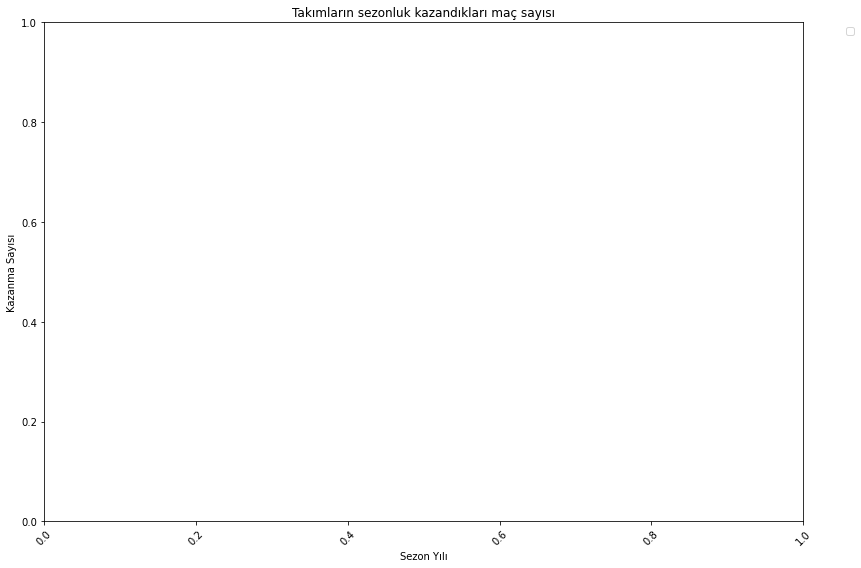

In [57]:
"""selected_teams = ['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', 'Tottenham Hotspur']
filtered_df = df[df['team'].isin(selected_teams)]


target_1_by_team_season = filtered_df[filtered_df['target'] == 1].groupby(['team', 'season'])['target'].sum().reset_index()


plt.figure(figsize=(12, 8))
sns.set_palette("husl", len(selected_teams)) 

sns.lineplot(data=target_1_by_team_season, x='season', y='target', hue='team', marker='o', linewidth=2.5)
plt.title('Takımların sezonluk kazandıkları maç sayısı')
plt.xlabel('Sezon Yılı')
plt.ylabel('Kazanma Sayısı')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()

plt.show()"""

In [123]:
"""import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_teams = ['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', 'Tottenham Hotspur']
filtered_df = df[df['team'].isin(selected_teams)]

target_1_by_team_season = filtered_df[filtered_df['target'] == 1].groupby(['team', 'season'])['target'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.set_palette("husl", len(selected_teams))
sns.set_style("whitegrid")  # Arka planı ızgaralı yapmak için

sns.lineplot(data=target_1_by_team_season, x='season', y='target', hue='team', marker='o', linewidth=2.5)
plt.title('Takımların sezonluk kazandıkları maç sayısı')
plt.xlabel('Sezon Yılı')
plt.ylabel('Kazanma Sayısı')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Y eksenindeki değerleri 1'er artırma
plt.yticks(range(0, target_1_by_team_season['target'].max() + 1, 1))

plt.tight_layout()
plt.grid(True)  # Izgaraları ekleme
plt.show()
"""

'import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nselected_teams = [\'Manchester City\', \'Liverpool\', \'Arsenal\', \'Manchester United\', \'Tottenham Hotspur\']\nfiltered_df = df[df[\'team\'].isin(selected_teams)]\n\ntarget_1_by_team_season = filtered_df[filtered_df[\'target\'] == 1].groupby([\'team\', \'season\'])[\'target\'].sum().reset_index()\n\nplt.figure(figsize=(12, 8))\nsns.set_palette("husl", len(selected_teams))\nsns.set_style("whitegrid")  # Arka planı ızgaralı yapmak için\n\nsns.lineplot(data=target_1_by_team_season, x=\'season\', y=\'target\', hue=\'team\', marker=\'o\', linewidth=2.5)\nplt.title(\'Takımların sezonluk kazandıkları maç sayısı\')\nplt.xlabel(\'Sezon Yılı\')\nplt.ylabel(\'Kazanma Sayısı\')\nplt.xticks(rotation=45)\nplt.legend(bbox_to_anchor=(1.05, 1), loc=\'upper left\')\n\n# Y eksenindeki değerleri 1\'er artırma\nplt.yticks(range(0, target_1_by_team_season[\'target\'].max() + 1, 1))\n\nplt.tight_layout()\nplt.grid(True)  # Izg

In [124]:
#sns.pairplot(df)

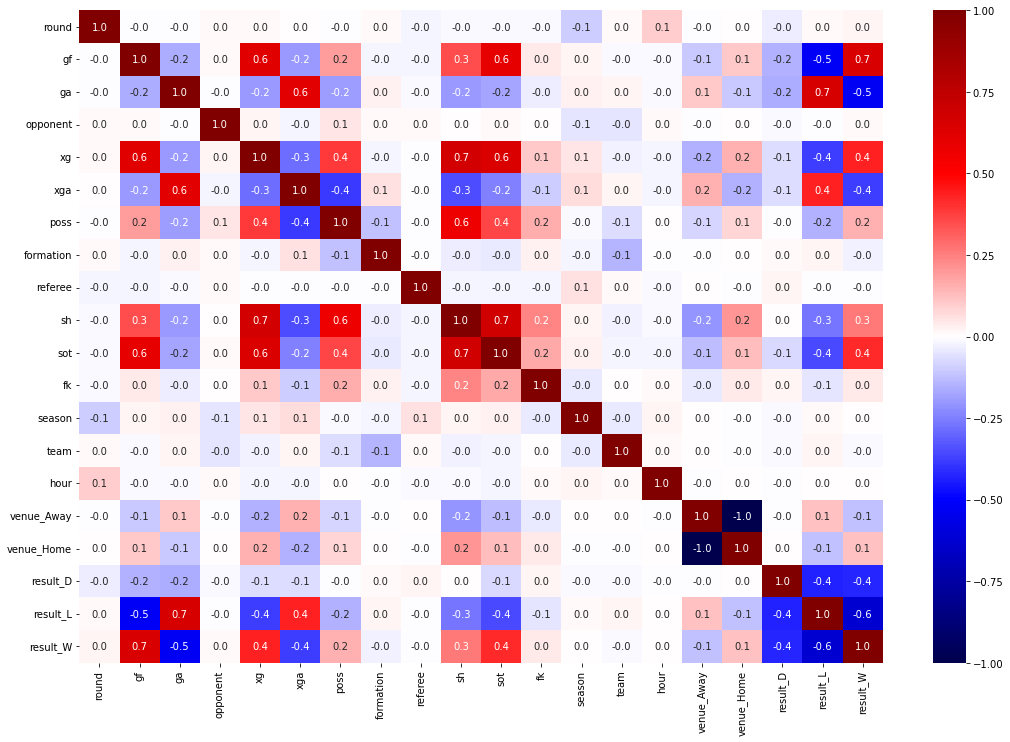

In [58]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');